In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score,\
precision_recall_curve, roc_curve, roc_auc_score ,auc, average_precision_score

In [2]:
df = pd.read_csv('../Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data_x = df.iloc[:, :-1]
data_y = df["Outcome"]

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)


In [4]:
d_tree = DecisionTreeClassifier()

d_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [5]:
y_pred = d_tree.predict(test_x)

accuracy_score(test_y, y_pred)

0.7272727272727273

In [6]:
## precision score
precision_score(test_y, y_pred)

0.6071428571428571

In [7]:
## recall_score
recall_score(test_y, y_pred)

0.6296296296296297

In [8]:
# Calculate the probabilities for each class
y_probs = d_tree.predict_proba(test_x)
# For binary classification, we use the probabilities of the positive class
y_probs = y_probs[:, 1]

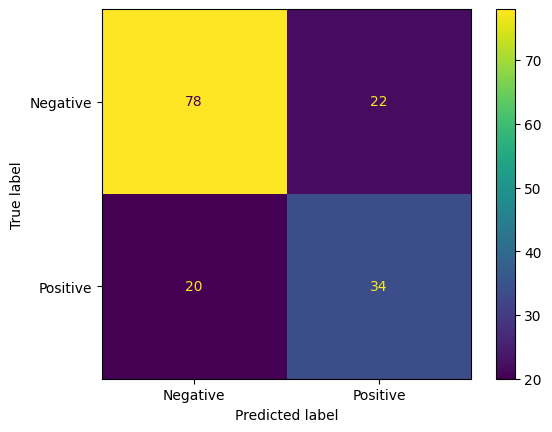

In [9]:
confusion_matrix(test_y, y_pred)
cfm = ConfusionMatrixDisplay(confusion_matrix(test_y, y_pred), display_labels=["Negative", "Positive"])
cfm.plot()

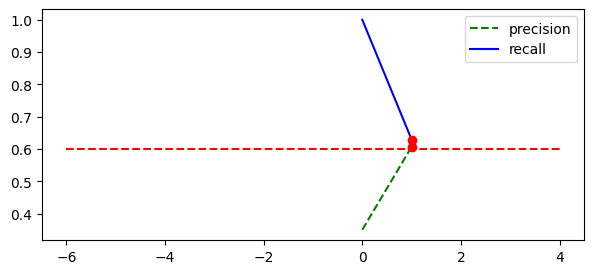

In [10]:
precision, recall, thresholds = precision_recall_curve(test_y, y_probs)
fig, ax = plt.subplots(figsize=(7,3))

threshold_60_precison_idx = np.argmax(precision >= 
0.5)

ax.plot(thresholds, precision[:-1], '--g', label='precision')
ax.plot(thresholds, recall[:-1], '-b', label="recall")
ax.plot(thresholds[threshold_60_precison_idx], precision[threshold_60_precison_idx], "ro")
ax.plot(thresholds[threshold_60_precison_idx], recall[threshold_60_precison_idx], "ro")
ax.hlines(0.6, -6, 4, "red", '--')

ax.legend()

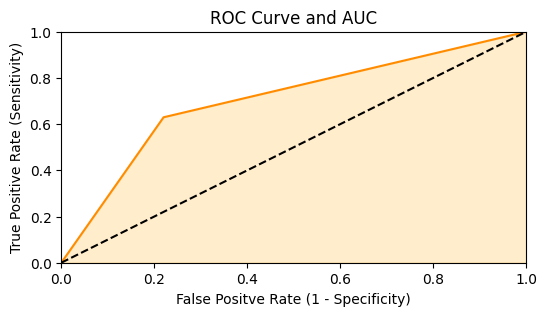

ROC's AUC Score:  0.7048148148148149


In [11]:
fpr, tpr, _ = roc_curve(test_y, y_probs)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(6,3))
ax.plot(fpr,tpr, color='darkorange')
x = np.linspace(0,1,10)
ax.plot(x,x, 'k--')
ax.axis([0,1,0,1])
ax.fill_between(fpr,tpr, alpha=0.2, color='orange')
ax.set_xlabel("False Positve Rate (1 - Specificity)")
ax.set_ylabel("True Positive Rate (Sensitivity)")
ax.set_title("ROC Curve and AUC")
plt.show()
 
score_ = roc_auc_score(test_y, y_probs)
print("ROC's AUC Score: ", score_)

In [12]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2,3,4,6,8,10],
    # 'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [13]:
grid_search = GridSearchCV(estimator=d_tree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=4)
grid_search.fit(train_x, train_y)
print("Best parameters found:", grid_search.best_params_)
best_d_tree = grid_search.best_estimator_
y_pred = best_d_tree.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy score:", accuracy)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4}
Accuracy score: 0.7467532467532467


In [14]:
random_forest = RandomForestClassifier()

In [17]:
param_grid = {
    # 'n_estimators':[100,120,140],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1, 2,3, 4],
}

In [16]:
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=4)
grid_search.fit(train_x, train_y)
print("Best parameters found:", grid_search.best_params_)
best_d_tree = grid_search.best_estimator_
y_pred = best_d_tree.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy score:", accuracy)

Fitting 5 folds for each of 264 candidates, totalling 1320 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'n_estimators': 140}
Accuracy score: 0.7792207792207793


In [22]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64